In [3]:
#import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
#read the csv file
df=pd.read_csv(r"C:\Users\User\Desktop\Codsoft\IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#finding shape
df.shape

(150, 5)

In [6]:
#finding size
df.size

750

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
#identifying null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
#statistics
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
#counting the values in species column
df["species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

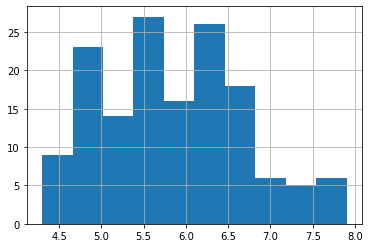

In [12]:
#histogram of sepal length
df["sepal_length"].hist()

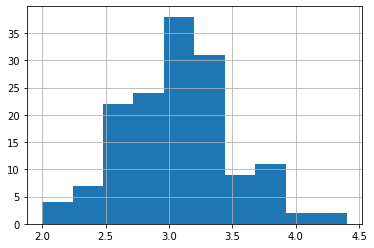

In [13]:
#histogram of sepal width
df["sepal_width"].hist()

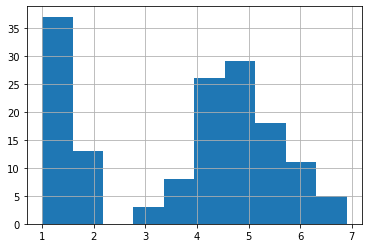

In [14]:
#histogram of petal length
df["petal_length"].hist()

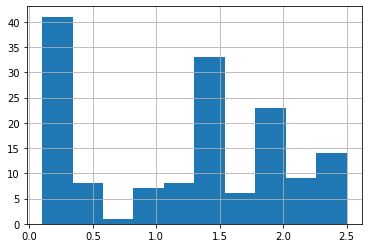

In [15]:
#histogram of petal width
df["petal_width"].hist()

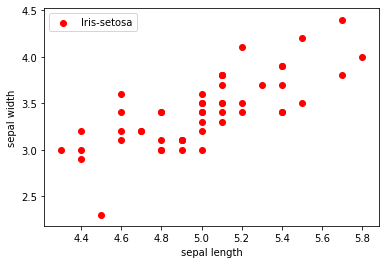

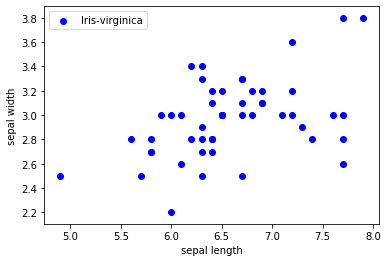

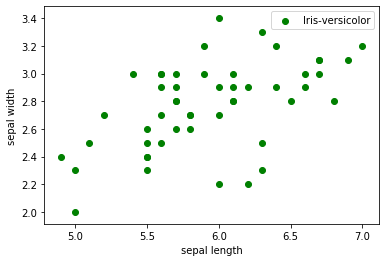

In [16]:
#scatter plot  for sepal length and width for all species
color=['red','blue','green']
species=['Iris-setosa','Iris-virginica','Iris-versicolor']
for i in range(3):
    x=df[df["species"]==species[i]]
    #print(x)
    plt.scatter(x['sepal_length'],x['sepal_width'],c=color[i],label=species[i])
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.legend()
    plt.show()

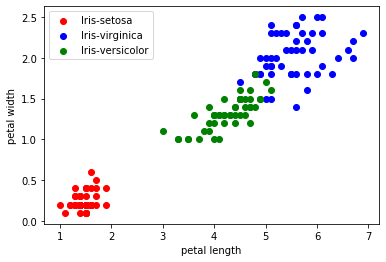

In [17]:
#scatter plot  for petal length and width for all species
color=['red','blue','green']
species=['Iris-setosa','Iris-virginica','Iris-versicolor']
for i in range(3):
    x=df[df["species"]==species[i]]
    #print(x)
    plt.scatter(x['petal_length'],x['petal_width'],c=color[i],label=species[i])
    plt.xlabel("petal length")
    plt.ylabel("petal width")
    plt.legend()

In [18]:
x=df.drop(['species'],axis=1)
y=df['species']

In [19]:
#training the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(y_train.shape)

(105, 4)
(105,)


In [20]:
#fitting the model
L=LogisticRegression()
L.fit(x_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
#predict y using training set
y_pred=L.predict(x_train)

In [22]:
# finding accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report
accuracy=accuracy_score(y_train,y_pred)
print(accuracy)
classi=classification_report(y_train,y_pred)
print(classi)

0.9619047619047619
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        31
Iris-versicolor       1.00      0.89      0.94        37
 Iris-virginica       0.90      1.00      0.95        37

       accuracy                           0.96       105
      macro avg       0.97      0.96      0.96       105
   weighted avg       0.97      0.96      0.96       105

